## Viewing the full MaNGA data cubes

Here we'll use an iPython widget slider to view the full spectral MaNGA data cube (_LOGCUBE_) which is described here: https://trac.sdss.org/wiki/MANGA/TRM/TRM_MPL-5/DAPDataModel

In [1]:
%matplotlib inline

In [2]:
import pylab as plt
import numpy as np
from IPython.html.widgets import interact
from astropy.io import fits

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
md = fits.open('../data/manga-8480-3701-LOGCUBE-SPX-GAU-MILESHC.fits')

In [4]:
ifu = md[1].data
ifu[ifu == 0] = np.nan

In [5]:
def browse_images(ifu):
    n = ifu.shape[0]
    def view_image(i):
        plt.figure(figsize=(5, 5))
        ax = plt.subplot(111)
        ur = ax.imshow(ifu[i-1], cmap=plt.cm.hot, rasterized=True)
        cb = plt.colorbar(ur)
        cb.set_label(r'$\rm{Flux}$ $10^{-17}$ $\rm{erg/s/cm}^2/\AA\rm{/spaxel}$', fontsize=14)
        ax.set_title(r'$\lambda = $ %.5g $\AA$' % md[4].data[i-1], fontsize=14)
        plt.show()
    interact(view_image, i=(1,n))

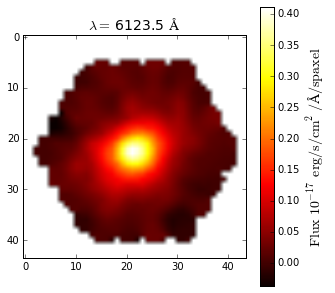

In [6]:
browse_images(ifu)

In [7]:
from astropy.io import fits
from matplotlib import pyplot
import numpy

# This is a bitmask handling object from the DAP source code
from mangadap.dapcube import DAPCubeBitMask

# Open the fits file
hdu_maps = fits.open('../data/manga-8480-3701-MAPS-SPX-GAU-MILESHC.fits.gz')
hdu_cube = fits.open('../data/manga-8480-3701-LOGCUBE-SPX-GAU-MILESHC.fits')

# Get the S/N per bin from the MAPS file
snr = numpy.ma.MaskedArray(hdu_maps['BIN_SNR'].data, mask=hdu_maps['BINID'].data < 0)

# Select the bin/spaxel with the highest S/N
k = numpy.ma.argmax(snr.ravel())
n = hdu_maps['BIN_SNR'].data.shape[0] # Number of pixels in X and Y
# Get the pixel coordinate
j = k//n
i = k - j*n

# Declare the bitmask object to mask selected pixels
bm = DAPCubeBitMask()
wave = hdu_cube['WAVE'].data
flux = numpy.ma.MaskedArray(hdu_cube['FLUX'].data[:,j,i],
                            mask=bm.flagged(hdu_cube['MASK'].data[:,j,i],
				[ 'IGNORED', 'FLUXINVALID', 'IVARINVALID', 'ARTIFACT' ]))
model = numpy.ma.MaskedArray(hdu_cube['MODEL'].data[:,j,i],
                             mask=bm.flagged(hdu_cube['MASK'].data[:,j,i], 'FITIGNORED'))
stellarcontinuum = numpy.ma.MaskedArray(
                        hdu_cube['MODEL'].data[:,j,i] - hdu_cube['EMLINE'].data[:,j,i]
                            - hdu_cube['EMLINE_BASE'].data[:,j,i],
                             mask=bm.flagged(hdu_cube['MASK'].data[:,j,i], 'FITIGNORED'))
emlines = numpy.ma.MaskedArray(hdu_cube['EMLINE'].data[:,j,i],
                               mask=bm.flagged(hdu_cube['EMLINE_MASK'].data[:,j,i],
                                               'ELIGNORED'))
resid = flux-model-0.5

pyplot.step(wave, flux, where='mid', color='k', lw=0.5)
pyplot.plot(wave, model, color='r', lw=1)
pyplot.plot(wave, stellarcontinuum, color='g', lw=1)
pyplot.plot(wave, emlines, color='b', lw=1)
pyplot.step(wave, resid, where='mid', color='0.5', lw=0.5)
pyplot.show()

SyntaxError: invalid syntax (dapcube.py, line 176)